In [1]:
%matplotlib inline

import gzip
import pickle
from urllib.request import urlretrieve
import zipfile

import nengo
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#from nengo_dl.compat import tf_shape

import nengo_dl

10000
50000
(50000, 784)
<class 'numpy.ndarray'>
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.   

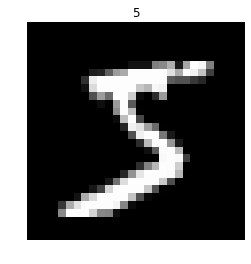

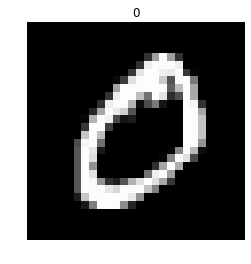

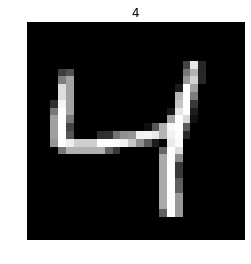

In [13]:
urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz",
            "mnist.pkl.gz")
with gzip.open("mnist.pkl.gz") as f:
    train_data, _, test_data = pickle.load(f, encoding="latin1")
train_data = list(train_data)
test_data = list(test_data)
print(len(test_data[1]))
print(len(train_data[0]))
print(train_data[0].shape)
print(type(train_data[1]))
print(test_data[0][0:2])
for data in (train_data, test_data):
    one_hot = np.zeros((data[0].shape[0], 10))
    one_hot[np.arange(data[0].shape[0]), data[1]] = 1
    data[1] = one_hot

for i in range(3):
    plt.figure()
    plt.imshow(np.reshape(train_data[0][i], (28, 28)),
               cmap="gray")
    plt.axis('off')
    plt.title(str(np.argmax(train_data[1][i])));

In [3]:
train_data

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])]

In [14]:
print(train_data[0][0:1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

with nengo.Network() as net:
    # set some default parameters for the neurons that will make
    # the training progress more smoothly
    net.config[nengo.Ensemble].max_rates = nengo.dists.Choice([100])
    net.config[nengo.Ensemble].intercepts = nengo.dists.Choice([0])
    neuron_type = nengo.LIF(amplitude=0.01)
    #print(neuron_type.probeable)
    #spikes = nengo.Probe(neuron_type,'spikes')
    # we'll make all the nengo objects in the network
    # non-trainable. we could train them if we wanted, but they don't
    # add any representational power. note that this doesn't affect
    # the internal components of tensornodes, which will always be
    # trainable or non-trainable depending on the code written in
    # the tensornode.
    nengo_dl.configure_settings(trainable=True)
    # the input node that will be used to feed in input images
    inp = nengo.Node([0] * 28 * 28)
    temp = nengo.Probe(inp)
    # add the first convolutional layer
    nengo_a = nengo.Ensemble(784, 1, neuron_type)
    conn_first = nengo.Connection(inp, nengo_a.neurons,solver=nengo.solvers.LstsqL2(weights=True))

    #x,conn1 = nengo_dl.tensor_layer(inp, tf.layers.dense,return_conn=True,units=784)
    #print("blah")
    #print(type(x))
    #print(x.tensor_func)
    #print(x.size_in)
    #print(x.size_out)
    #x,conn = nengo_dl.tensor_layer(inp, tf.layers.dense,return_conn=True,units=784)
    #conn = nengo.Connection(inp, x)
    #net.config[conn].trainable = True
    # apply the neural nonlinearity
    #x = nengo_dl.tensor_layer(x, neuron_type)
    
    #conv
    #x,conn2 = nengo_dl.tensor_layer(
       # x, tf.layers.dense,return_conn=True, units=256)
    
    #print(x.size_in)
    #print(x.size_out)

    # apply the neural nonlinearity
    #solver=nengo.solvers.LstsqL2(weights=True)
    x,conn10 = nengo_dl.tensor_layer(x, neuron_type,return_conn=True, )
    conn10.solver = nengo.solvers.LstsqL2(weights=True)
    print("blah again")
    print(type(x))
    print(conn10.solver)

    # add another convolutional layer
    x,conn3 = nengo_dl.tensor_layer(
        x, tf.layers.dense, return_conn=True, units=64)
    x = nengo_dl.tensor_layer(x, neuron_type)

 

    # another convolutional layer
    x,conn4 = nengo_dl.tensor_layer(
        x, tf.layers.dense, return_conn=True, units=16)
    x = nengo_dl.tensor_layer(x, neuron_type)

 

    # linear readout
    x,conn5 = nengo_dl.tensor_layer(x, tf.layers.dense, return_conn=True, units=10)

    # we'll create two different output probes, one with a filter
    # (for when we're simulating the network over time and
    # accumulating spikes), and one without (for when we're
    # training the network using a rate-based approximation)
    print(x.probeable)
    out_p = nengo.Probe(x)
    out_p_filt = nengo.Probe(x, synapse=0.1)
    

n_in = 784
n_hidden = 64
minibatch_size = 50
with nengo.Network() as auto_net:
    # input
    nengo_a = nengo.Node(np.zeros(n_in))
    print(nengo_a.size_out)

    # first layer
    nengo_b = nengo.Ensemble(
        n_hidden, 1, neuron_type=nengo.RectifiedLinear())
    print(nengo_b.size_in)
    nengo.Connection(
        nengo_a, nengo_b.neurons, transform=nengo_dl.dists.Glorot())

    # second layer
    nengo_c = nengo.Ensemble(
        n_in, 1, neuron_type=nengo.RectifiedLinear())
    nengo.Connection(
        nengo_b.neurons, nengo_c.neurons,
        transform=nengo_dl.dists.Glorot())

    # probes are used to collect data from the network
    p_c = nengo.Probe(nengo_c.neurons)

with nengo.Network() as net:
    # set some default parameters for the neurons that will make
    # the training progress more smoothly
    net.config[nengo.Ensemble].max_rates = nengo.dists.Choice([100])
    net.config[nengo.Ensemble].intercepts = nengo.dists.Choice([0])
    neuron_type = nengo.LIF(amplitude=0.01)

    nengo_dl.configure_settings(trainable=True)
    # the input node that will be used to feed in input images
    inp = nengo.Node(np.zeros(784))
    print(inp.size_out)
    temp = nengo.Probe(inp)
    # add the first layer
    nengo_a = nengo.Ensemble(784, 1, neuron_type = neuron_type)
    nengo.Connection(inp, nengo_a.neurons, transform=nengo_dl.dists.Glorot())
    
    nengo_b = nengo.Ensemble(256, 1, neuron_type = neuron_type)
    print(nengo_b.size_in)
    nengo.Connection(nengo_a, nengo_b, solver=nengo.solvers.LstsqL2(weights=True),transform=nengo_dl.dists.Glorot())
    
    nengo_c = nengo.Ensemble(64, 1, neuron_type = neuron_type)
    nengo.Connection(nengo_b, nengo_c,solver=nengo.solvers.LstsqL2(weights=True),transform=nengo_dl.dists.Glorot())
    
    nengo_d = nengo.Ensemble(16, 1, neuron_type = neuron_type)
    nengo.Connection(nengo_c, nengo_d,solver=nengo.solvers.LstsqL2(weights=True), transform=nengo_dl.dists.Glorot())
    
    # add another convolutional lay
    #nengo_e = nengo.Ensemble(10, 1, neuron_type = neuron_type)
    #nengo.Connection(nengo_d, nengo_e,solver=nengo.solvers.LstsqL2(weights=True),transform=nengo_dl.dists.Glorot(), label="conn_fifth")


    # we'll create two different output probes, one with a filter
    # (for when we're simulating the network over time and
    # accumulating spikes), and one without (for when we're
    # training the network using a rate-based approximation)
    x, conn = nengo_dl.tensor_layer(nengo_d, tf.layers.dense, return_conn=True, units=10)
    print(x.probeable)
    out_p = nengo.Probe(x)
    out_p_filt = nengo.Probe(x, synapse=0.1)
    

In [4]:
with nengo.Network() as net:
    # set some default parameters for the neurons that will make
    # the training progress more smoothly
    net.config[nengo.Ensemble].max_rates = nengo.dists.Choice([100])
    net.config[nengo.Ensemble].intercepts = nengo.dists.Choice([0])
    neuron_type = nengo.LIF(amplitude=0.01)

    nengo_dl.configure_settings(trainable=True)
    # the input node that will be used to feed in input images
    inp = nengo.Node(np.zeros(784))
    
    print(inp.size_out)
    temp = nengo.Probe(inp)
    # add the first layer
    x, conn1 = nengo_dl.tensor_layer(inp, neuron_type, transform=nengo_dl.dists.Glorot(),shape_in=(784,), return_conn=True)
    print(type(x))
    A_spikes = nengo.Probe(x)
    x, conn2 = nengo_dl.tensor_layer(x, neuron_type, transform=nengo_dl.dists.Glorot(),shape_in=(256,), return_conn=True)
    print(conn2.size_out)
    x, conn3 = nengo_dl.tensor_layer(x, neuron_type, transform=nengo_dl.dists.Glorot(),shape_in=(64,), return_conn=True)
    
    x, conn4 = nengo_dl.tensor_layer(x, neuron_type, transform=nengo_dl.dists.Glorot(),shape_in=(16,), return_conn=True)
    
    #x, conn5 = nengo_dl.tensor_layer(x, neuron_type, transform=nengo_dl.dists.Glorot(),shape_in=(10,), return_conn=True)
    
    x,conn_l = nengo_dl.tensor_layer(x, tf.layers.dense, units=10, return_conn=True)


    # we'll create two different output probes, one with a filter
    # (for when we're simulating the network over time and
    # accumulating spikes), and one without (for when we're
    # training the network using a rate-based approximation)
    print(x.probeable)
    out_p = nengo.Probe(x)
    out_p_filt = nengo.Probe(x, synapse=0.1)
    

784
<class 'nengo.ensemble.Neurons'>
256
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
('output',)


In [5]:
minibatch_size = 200
sim = nengo_dl.Simulator(net, minibatch_size=minibatch_size)

Build finished in 0:00:00                                                      
|#                Optimizing graph: creating signals                  | 0:00:00

/anaconda3/lib/python3.7/site-packages/nengo_dl/simulator.py:131: UserWarning: No GPU support detected. It is recommended that you install tensorflow-gpu (`pip install tensorflow-gpu`).
  "No GPU support detected. It is recommended that you "


Optimization finished in 0:00:00                                               
Construction finished in 0:00:01                                               #########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [6]:
# add the single timestep to the training data
train_data = {inp: train_data[0][:, None, :],
              out_p: train_data[1][:, None, :]}

# when testing our network with spiking neurons we will need to run it
# over time, so we repeat the input/target data for a number of
# timesteps. we're also going to reduce the number of test images, just
# to speed up this example.
n_steps = 30
test_data = {
    inp: np.tile(test_data[0][:minibatch_size*2, None, :],
                 (1, n_steps, 1)),
    out_p_filt: np.tile(test_data[1][:minibatch_size*2, None, :],
                        (1, n_steps, 1))}
print(test_data[inp].shape)

(400, 30, 784)


In [7]:
def objective(outputs, targets):
    return tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=outputs, labels=targets)

In [8]:
opt = tf.train.RMSPropOptimizer(learning_rate=0.001)

In [9]:
def classification_error(outputs, targets):
    return 100 * tf.reduce_mean(
        tf.cast(tf.not_equal(tf.argmax(outputs[:, -1], axis=-1),
                             tf.argmax(targets[:, -1], axis=-1)),
                tf.float32))

print("error before training: %.2f%%" % sim.loss(
    test_data, {out_p_filt: classification_error}))

|####################Calculating loss (100%)###################| ETA:  00:00:00WARNING:tensorflow:From /anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


Calculation finished in 0:00:12                                                
error before training: 89.00%


In [10]:
do_training = True
#summ_list = []
if do_training:
    # run training
    sim.train(train_data, opt, objective={out_p: objective},n_epochs=10,summaries=[conn_l])
    #print(sim.probeable)
    # save the parameters to file
    sim.save_params("./mnist_params")
#else:
    # download pretrained weights
    #urlretrieve(
      #  "https://drive.google.com/uc?export=download&id=1u9JyNuRxQDUcFgkRnI1qfJVFMdnGRsjI",
       # "mnist_params.zip")
    #with zipfile.ZipFile("mnist_params.zip") as f:
        #f.extractall()

    # load parameters
    #sim.load_params("./mnist_params")

|                   Training (0%)                  | ETA:  --:--:-- (loss: ---)

/anaconda3/lib/python3.7/site-packages/nengo_dl/simulator.py:575: UserWarning: Simulator was created with tensorboard=False; ignoring requested summaries
  warnings.warn("Simulator was created with tensorboard=False; "


|                   Training (0%)                  | ETA:  --:--:-- (loss: ---)WARNING:tensorflow:From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/array_grad.py:425: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Training finished in 0:12:04 (loss: 5.7278)                                    


In [11]:
print("error after training: %.2f%%" % sim.loss(
    test_data, {out_p_filt: classification_error}))

Calculation finished in 0:00:03                                                
error after training: 3.00%


Simulation finished in 0:00:02                                                 
oooo
(200, 30, 784)
(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.     

NameError: name 'conn5' is not defined

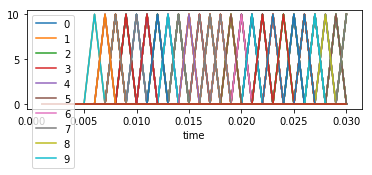

In [12]:
#import pandas as pd
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
import sys
np.set_printoptions(threshold=sys.maxsize)

sim.run_steps(n_steps, data={inp: test_data[inp][:minibatch_size]})

for i in range(1):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(np.reshape(test_data[inp][i, 0], (28, 28)),
               cmap="gray")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(sim.trange(), sim.data[out_p_filt][i])
    plt.legend([str(i) for i in range(10)], loc="upper left")
    plt.xlabel("time")
    
    plt.subplot(2, 1, 1)
    plt.plot(sim.trange(), sim.data[A_spikes][i])
    plt.legend([str(i) for i in range(10)], loc="upper left")
    plt.xlabel("time")
    #plt.subplot(2, 1, 1)
    #plt.plot(sim.trange(), sim.data[temp][i])
    #plt.legend([str(i) for i in range(10)], loc="best")
    #plt.xlabel("time")
    
    #print(sim.data[inp]) #temp gives input current given to the 784 neurons for all input images
    #print(sim.data[inp][i,0].shape) #i denotes the index of image in the minibatch
    #print(sim.data[A_spikes][i]) #w
    
    print("oooo")
    
    print(sim.data[temp].shape) #temp gives input current given to the 784 neurons for all input images
    print(sim.data[temp][i,0].shape) #i denotes the index of image in the minibatch
    print(sim.data[temp][i,0]) #we are giving the same input for 30 steps so just i,o would give the input without repetition
    
    print(sim.data[out_p_filt][i].shape) #this is for output current
    print(sim.data[out_p_filt][i])
    
    print("we are here")
    #print(sim.data[conn1].weights)  # connection weights
    #print(sim.data[conn2].weights)
    #print(sim.data[conn3].weights)
    print(sim.data[conn5].weights)
    
    #print(sim.data[ens].bias)  # bias values
    #print(sim.data[ens].encoders)  # encoder values
    #print(sim.data[ens])  # to see all the parameters for an object

    
    #with open('out.txt', 'w') as f:
    #print >> f, 'Filename:', filename     # Python 2.x
        #print(sim.data[temp][i], file=f) 
  

In [ ]:
#Sess = tf.compat.v1.Session()

In [ ]:
#trial = tf.trainable_variables(scope=None)

In [ ]:
#Sess. run(tf.trainable_weights())

In [ ]:
te = np.arange(18)

In [ ]:
te.reshape(3,6)

In [ ]:
aligned(8)

In [ ]:
time  = np.arange(1, 201, 1)

In [ ]:
time

In [15]:
np.dot([1,2,3],[1,2,3])

14

In [16]:
pot = [1,0,0,9,7]
tada = max(pot)

In [17]:
tada

9

In [19]:
import random
random.uniform(0.5,1)


0.8288545086937564